In [158]:
import pandas as pd
import numpy as np
import ast
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [159]:
plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False

# 데이터 확인

In [160]:
port = pd.read_csv("C:/Users/minji/전민정ㅎ/실전 프로젝트/archive (8)/portfolio.csv",index_col=0)
port.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [161]:
profile = pd.read_csv("C:/Users/minji/전민정ㅎ/실전 프로젝트/archive (8)/profile.csv",index_col=0)
profile.head()

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [162]:
trans = pd.read_csv("C:/Users/minji/전민정ㅎ/실전 프로젝트/archive (8)/transcript.csv",index_col=0)
trans.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [163]:
port.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes


In [164]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 796.9+ KB


In [165]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 11.7+ MB


In [166]:
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

# 전처리

In [167]:
trans['value'] = trans['value'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
trans['amount'] = trans['value'].apply(lambda x: x.get('amount') if isinstance(x, dict) else None)
trans['amount'] = trans['amount'].astype(float)
trans['offer_id'] = trans['value'].apply(lambda x: x.get('offer id') or x.get('offer_id') if isinstance(x, dict) else None)

In [168]:
print(profile['income'].min())
print(profile['income'].median())
print(profile['income'].max())

30000.0
64000.0
120000.0


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


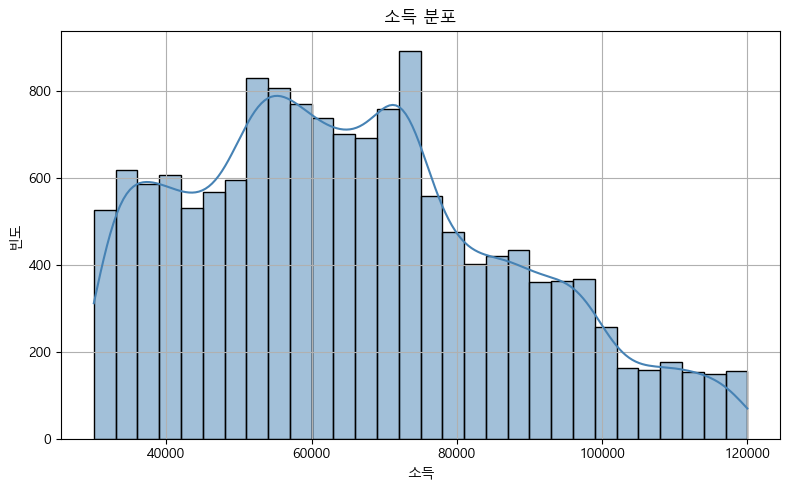

In [169]:
# sns.histplot(data=profile, x='income', kde=True)
plt.figure(figsize=(8, 5))
sns.histplot(profile['income'], bins=30, kde=True, color='steelblue')
plt.title("소득 분포")
plt.xlabel("소득")
plt.ylabel("빈도")
plt.grid(True)
plt.tight_layout()
plt.show()

In [170]:
income_median = profile['income'].median()
profile['income'].fillna(income_median, inplace=True)
profile['income']

0         64000.0
1        112000.0
2         64000.0
3        100000.0
4         64000.0
           ...   
16995     54000.0
16996     72000.0
16997     73000.0
16998     50000.0
16999     82000.0
Name: income, Length: 17000, dtype: float64

In [171]:
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
profile['became_member_on'] = profile['became_member_on'].dt.date

In [172]:
trans.drop(columns=['value'], axis=1, inplace=True)
port.drop(columns=['channels'], axis=1, inplace=True)

# 거래 기록이 있는 고객 대상

In [173]:
trans = trans[trans['event'] == 'transaction']

In [174]:
trans_df = pd.merge(trans, profile, how = 'left', left_on = 'person', right_on = 'id')
trans_df

,person,event,time,amount,offer_id,gender,age,id,became_member_on,income
0,02c083884c7d45b39cc68e1314fec56c,transaction,0,0.83,None,F,20,02c083884c7d45b39cc68e1314fec56c,2016-07-11,30000.0
1,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,0,34.56,None,M,42,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,2016-01-17,96000.0
2,54890f68699049c2a04d415abc25e717,transaction,0,13.23,None,M,36,54890f68699049c2a04d415abc25e717,2017-12-28,56000.0
3,b2f1cd155b864803ad8334cdf13c4bd2,transaction,0,19.51,None,F,55,b2f1cd155b864803ad8334cdf13c4bd2,2017-10-16,94000.0
4,fe97aa22dd3e48c8b143116a8403dd52,transaction,0,18.97,None,F,39,fe97aa22dd3e48c8b143116a8403dd52,2017-12-17,67000.0
...,...,...,...,...,...,...,...,...,...,...
138948,b3a1272bc9904337b331bf348c3e8c17,transaction,714,1.59,None,M,66,b3a1272bc9904337b331bf348c3e8c17,2018-01-01,47000.0
138949,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,9.53,None,M,52,68213b08d99a4ae1b0dcb72aebd9aa35,2018-04-08,62000.0
138950,a00058cf10334a308c68e7631c529907,transaction,714,3.61,None,F,63,a00058cf10334a308c68e7631c529907,2013-09-22,52000.0
138951,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,3.53,None,M,57,76ddbd6576844afe811f1a3c0fbb5bec,2016-07-09,40000.0


In [175]:
trans_df.drop(columns=['offer_id'], axis=1, inplace=True)

In [176]:
trans_df['became_member_on'] = pd.to_datetime(trans_df['became_member_on'], format='%Y%m%d')

In [177]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138953 entries, 0 to 138952
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   person            138953 non-null  object        
 1   event             138953 non-null  object        
 2   time              138953 non-null  int64         
 3   amount            138953 non-null  float64       
 4   gender            123957 non-null  object        
 5   age               138953 non-null  int64         
 6   id                138953 non-null  object        
 7   became_member_on  138953 non-null  datetime64[ns]
 8   income            138953 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 9.5+ MB


## EDA

In [178]:
num_cols_tx = trans_df.select_dtypes(include='number').columns
corr_tx = trans_df[num_cols_tx].corr()
corr_tx

,time,amount,age,income
time,1.000000,0.004678,0.006908,0.002842
amount,0.004678,1.000000,-0.030722,0.231026
age,0.006908,-0.030722,1.000000,0.207365
income,0.002842,0.231026,0.207365,1.000000


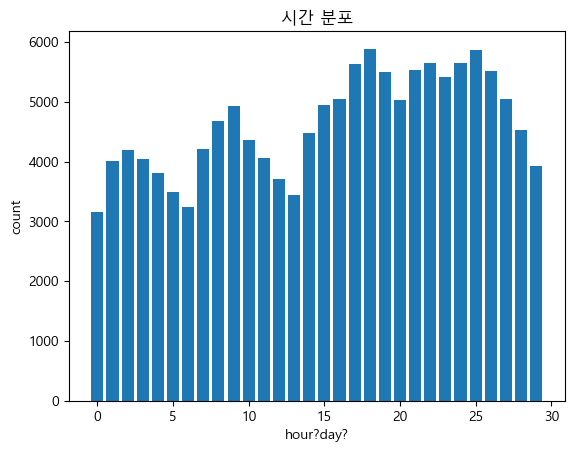

In [183]:
trans_df['time_group'] = trans_df['time'] // 24  
time_group_counts = trans_df['time_group'].value_counts().sort_index()

plt.bar(time_group_counts.index, time_group_counts.values)
plt.title('시간 분포')
plt.xlabel('hour?day?')
plt.ylabel('count')
plt.xticks() 
plt.show()

In [184]:
trans_df['time_group'].value_counts().sort_index()

time_group
0     3159
1     4006
2     4190
3     4035
4     3814
5     3484
6     3235
7     4211
8     4671
9     4928
10    4367
11    4059
12    3703
13    3433
14    4484
15    4943
16    5054
17    5634
18    5887
19    5506
20    5030
21    5525
22    5656
23    5407
24    5655
25    5866
26    5510
27    5044
28    4529
29    3928
Name: count, dtype: int64

In [186]:
trans_df['gender'].unique()

array(['F', 'M', nan, 'O'], dtype=object)

### 성별이 null인 데이터 제거한 데이터프레임

In [187]:
# 성별이 null인 데이터 제거한 데이터프레임
gender_df = trans_df.dropna(subset=['gender'])
gender_df = gender_df[(gender_df['gender'] == 'M') | (gender_df['gender'] == 'F')]
#gender_df['gender'] = gender_df['gender'].apply(lambda x : 1 if x == 'F' else 0)

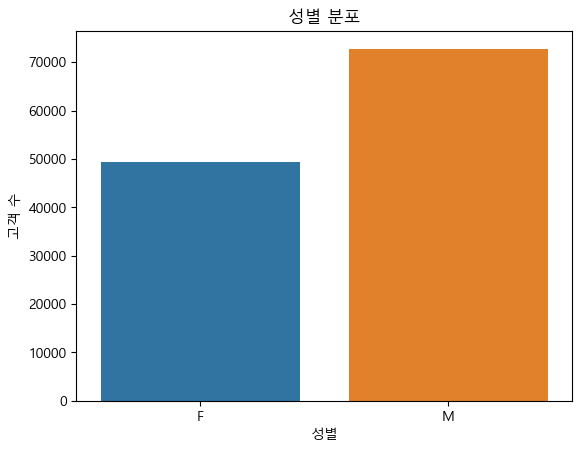

In [188]:
sns.countplot(x = 'gender', data = gender_df)
plt.title('성별 분포')
plt.xlabel('성별')
plt.ylabel('고객 수')
plt.show()

In [189]:
# null값 제외한 성별 비율
pd.DataFrame(gender_df['gender'].value_counts()/gender_df['gender'].count())

,count
gender,
M,0.595813
F,0.404187


### 중복없는 고객 데이터 확인

In [191]:
print("고객 수(중복x) : ",trans_df['person'].nunique())

고객 수(중복x) :  16578


In [192]:
person_df = trans_df.drop_duplicates(subset='person', keep='first')
person_df

,person,event,time,amount,gender,age,id,became_member_on,income,time_group
0,02c083884c7d45b39cc68e1314fec56c,transaction,0,0.83,F,20,02c083884c7d45b39cc68e1314fec56c,2016-07-11,30000.0,0
1,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,0,34.56,M,42,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,2016-01-17,96000.0,0
2,54890f68699049c2a04d415abc25e717,transaction,0,13.23,M,36,54890f68699049c2a04d415abc25e717,2017-12-28,56000.0,0
3,b2f1cd155b864803ad8334cdf13c4bd2,transaction,0,19.51,F,55,b2f1cd155b864803ad8334cdf13c4bd2,2017-10-16,94000.0,0
4,fe97aa22dd3e48c8b143116a8403dd52,transaction,0,18.97,F,39,fe97aa22dd3e48c8b143116a8403dd52,2017-12-17,67000.0,0
...,...,...,...,...,...,...,...,...,...,...
138598,542c41f5afc049e7ae7d4721ace9d286,transaction,714,1.63,NaN,118,542c41f5afc049e7ae7d4721ace9d286,2018-04-06,64000.0,29
138676,448dabde725040978b8a247a20bac126,transaction,714,3.19,M,50,448dabde725040978b8a247a20bac126,2018-01-07,60000.0,29
138719,7718656997f3453db0f5aeca9cd35240,transaction,714,15.35,F,73,7718656997f3453db0f5aeca9cd35240,2018-05-01,65000.0,29
138736,54463e5d95124b7fb3133fc1eae71952,transaction,714,0.76,M,42,54463e5d95124b7fb3133fc1eae71952,2017-11-04,69000.0,29


In [193]:
print("최소 나이: ", person_df['age'].min())
print("최소 나이: ", person_df['age'].max())

최소 나이:  18
최소 나이:  118


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


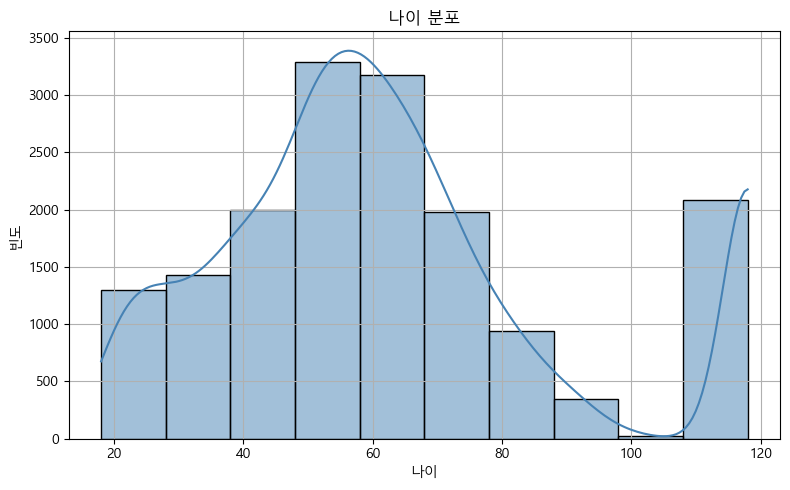

In [194]:
# sns.histplot(data = person_df, x = 'age')
plt.figure(figsize=(8, 5))
sns.histplot(person_df['age'], bins=10, kde=True, color='steelblue')
plt.title("나이 분포")
plt.xlabel("나이")
plt.ylabel("빈도")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def group_age(age):
  if 10 <= age < 20:
    return '10대'
  elif 20 <= age < 30:
    return '20대'
  elif 30 <= age < 40:
    return '30대'
  elif 40 <= age < 50:
    return '40대'
  elif 50 <= age < 60:
    return '50대'
  elif 60 <= age < 70:
    return '60대'
  elif 70 <= age < 80:
    return '70대'
  elif 80 <= age < 90:
    return '80대'
  elif 90 <= age < 100:
    return '90대'
  elif 100 <= age < 110:
    return '100대'
  else:
    return '110대'
person_df['age_group'] = person_df['age'].apply(group_age)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_8660\2773226752.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  person_df['age_group'] = person_df['age'].apply(group_age)


In [196]:
person_df['age_group'].value_counts()

age_group
50대     3440
60대     2921
40대     2247
110대    2086
70대     1737
30대     1507
20대     1362
80대      809
90대      248
10대      204
100대      17
Name: count, dtype: int64

## trans_df

In [197]:
trans_df['age_group'] = trans_df['age'].apply(group_age)
trans_df = trans_df[trans_df['age_group'] != '110대']

In [199]:
trans_df['became_member_on'].value_counts()

became_member_on
2017-12-12    301
2017-12-07    294
2018-01-25    264
2017-10-07    253
2017-08-15    247
             ... 
2014-10-15      3
2015-07-24      3
2015-04-07      3
2014-03-13      3
2014-10-05      2
Name: count, Length: 1706, dtype: int64

In [200]:
print(trans_df['became_member_on'].min())
print(trans_df['became_member_on'].max())

2013-07-29 00:00:00
2018-07-26 00:00:00


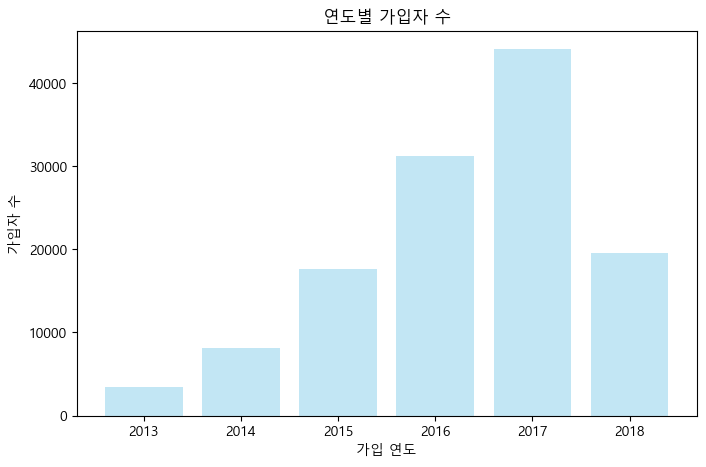

In [201]:
member_by_year = trans_df['became_member_on'].dt.year.value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(member_by_year.index, member_by_year.values, alpha=0.5, color='skyblue')
plt.xlabel('가입 연도')
plt.ylabel('가입자 수')
plt.title('연도별 가입자 수')
plt.show()

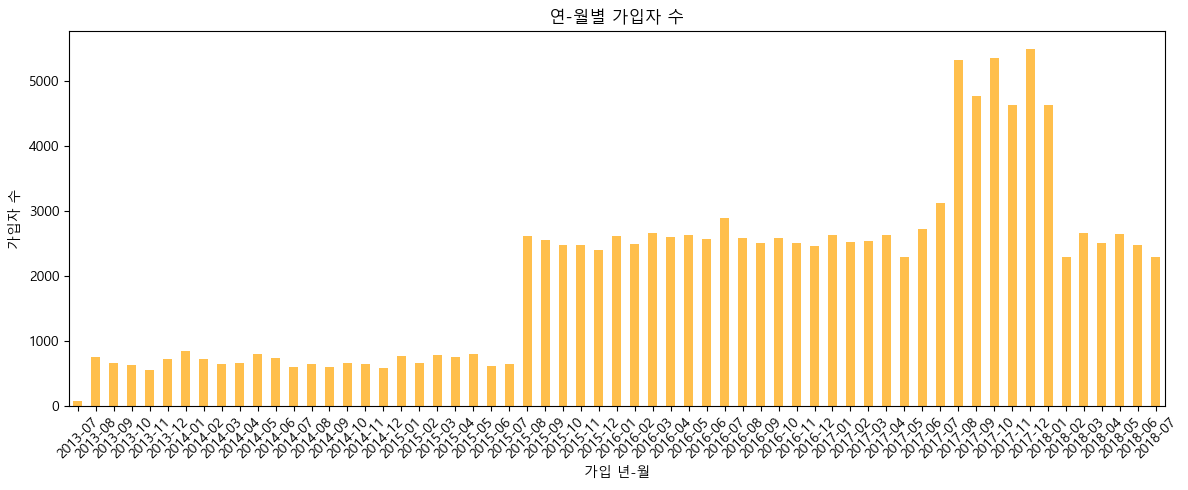

In [ ]:
# Period 기준 그룹화(chat gpt 코드)
join_counts = trans_df['became_member_on'].dt.to_period('M').value_counts().sort_index()

# 시각화
plt.figure(figsize=(12, 5))
join_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title('연-월별 가입자 수')
plt.xlabel('가입 년-월')
plt.ylabel('가입자 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [211]:
trans_df['year'] = trans_df['became_member_on'].dt.year
trans_df.groupby(['person', 'year']).agg({'person':'count', 'amount':'sum'})

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_8660\1142727769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_df['year'] = trans_df['became_member_on'].dt.year


,,person,amount
person,year,,
0009655768c64bdeb2e877511632db8f,2017,8,127.60
0011e0d4e6b944f998e987f904e8c1e5,2018,5,79.46
0020c2b971eb4e9188eac86d93036a77,2016,8,196.86
0020ccbbb6d84e358d3414a3ff76cffd,2016,12,154.05
003d66b6608740288d6cc97a6903f4f0,2017,18,48.34
...,...,...,...
fff3ba4757bd42088c044ca26d73817a,2015,11,580.98
fff7576017104bcc8677a8d63322b5e1,2017,6,29.94
fff8957ea8b240a6b5e634b6ee8eafcf,2018,5,12.15
